In [57]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error, r2_score, roc_auc_score, roc_curve

#import shap
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

In [58]:
hospital_table_3 = pd.read_csv(r"C:\Users\amirf\Downloads\hospital_table_3.csv",parse_dates=['Date'], index_col='Date')
hospital_table_3.head()


,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,avg mild sick,moderate sick,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick
Date,,,,,,,,,,,,,,,,,,,
2020-03-11,79,45.6,47.8,7.0,40.0,63.8,100.0,72.0,45.8,100.0,46.2,0.0,0.0,0.0,0.0,6.0,50.0,100.0,67.3
2020-03-12,102,49.0,49.9,2.0,40.0,63.8,100.0,95.0,49.5,100.0,48.9,0.0,0.0,0.0,0.0,1.0,50.0,100.0,67.3
2020-03-13,120,47.5,49.2,8.0,40.0,63.8,100.0,109.0,47.7,100.0,47.3,6.0,40.0,100.0,68.0,3.0,50.0,100.0,67.3
2020-03-14,158,49.4,47.4,12.0,0.0,70.3,100.0,148.0,50.7,100.0,45.7,2.0,40.0,100.0,68.0,10.0,20.0,100.0,76.8
2020-03-15,197,51.8,46.5,6.0,20.0,74.0,100.0,183.0,52.5,100.0,44.6,10.0,50.0,100.0,61.3,8.0,37.5,100.0,79.0


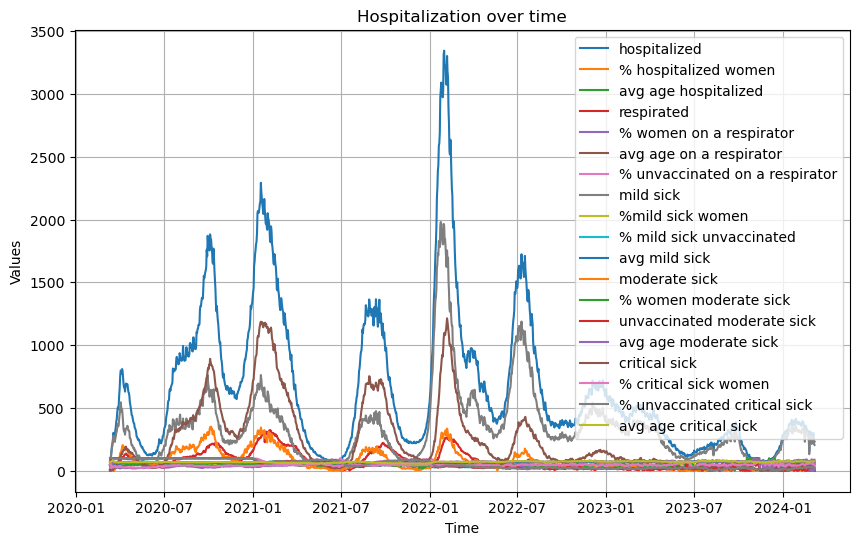

In [59]:
# visualization of all features

plt.figure(figsize=(10, 6))
for column in hospital_table_3.columns:
    plt.plot(hospital_table_3.index, hospital_table_3[column], label=column)

plt.title('Hospitalization over time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

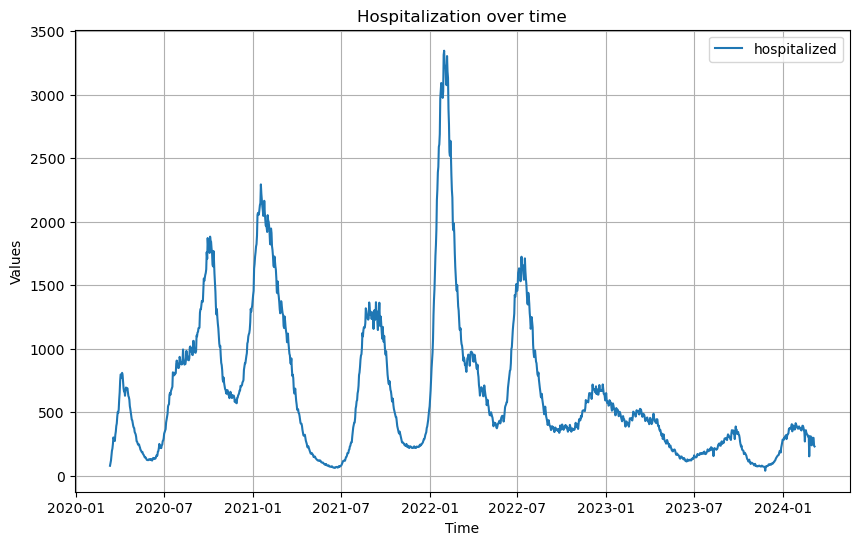

In [60]:
# visualization - 1 feature

plt.figure(figsize=(10, 6))
plt.plot(hospital_table_3.index, hospital_table_3["hospitalized"], label="hospitalized")

plt.title('Hospitalization over time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

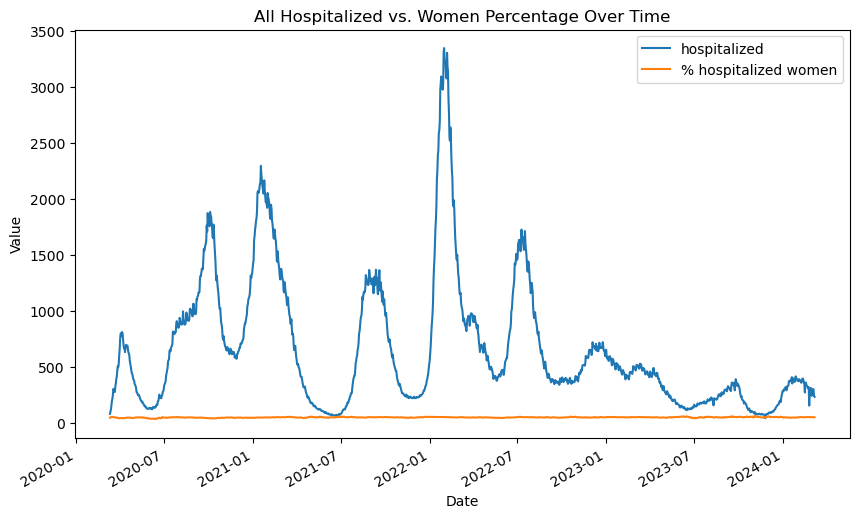

In [61]:
# visualization of 2 features

# Select the two features you want to plot
feature1 = 'hospitalized'
feature2 = '% hospitalized women'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature
ax.plot(hospital_table_3.index, hospital_table_3[feature2], label=feature2)

# Customize the plot
plt.title('All Hospitalized vs. Women Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

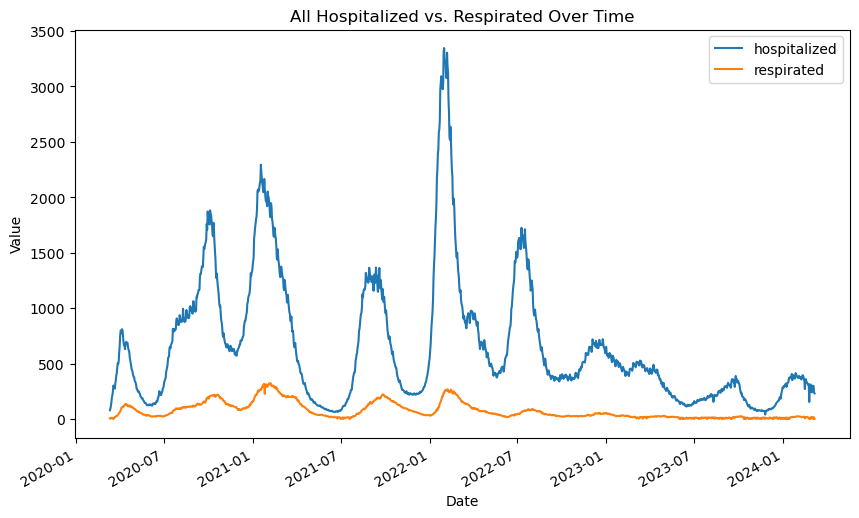

In [62]:
# visualization of 2 features

# Select the two features you want to plot
feature1 = 'hospitalized'
feature2 = 'respirated'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature
ax.plot(hospital_table_3.index, hospital_table_3[feature2], label=feature2)

# Customize the plot
plt.title('All Hospitalized vs. Respirated Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

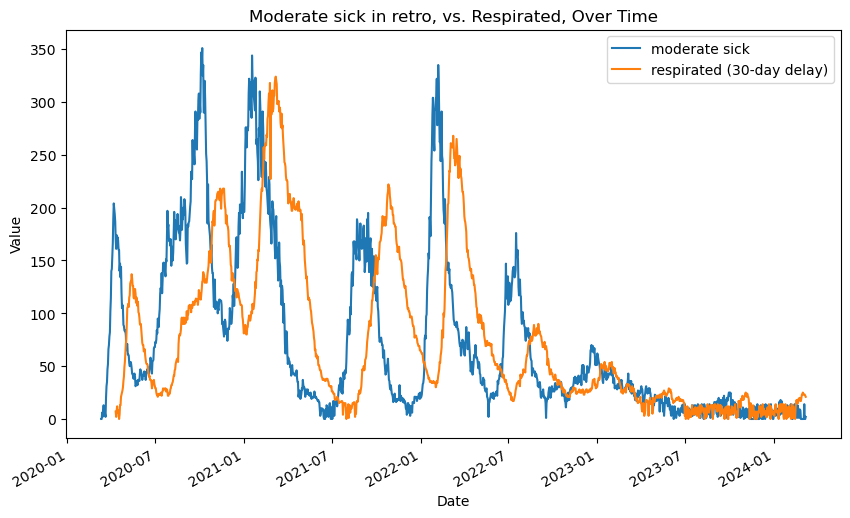

In [63]:
# visualization of 2 features, one of them delayed in time

# Select the two features you want to plot
feature1 = 'moderate sick'
feature2 = 'respirated'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature with 30 days delay
ax.plot(hospital_table_3.index[30:], hospital_table_3[feature2][:-30], label=f'{feature2} (30-day delay)')

# Customize the plot
plt.title('Moderate sick in retro, vs. Respirated, Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

In [64]:
# adding columns of time categories to the date index - month and years

hospital_table_3['month'] = hospital_table_3.index.month
hospital_table_3['year'] = hospital_table_3.index.year   
hospital_table_3.head()

,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,...,moderate sick,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-11,79,45.6,47.8,7.0,40.0,63.8,100.0,72.0,45.8,100.0,...,0.0,0.0,0.0,0.0,6.0,50.0,100.0,67.3,3,2020
2020-03-12,102,49.0,49.9,2.0,40.0,63.8,100.0,95.0,49.5,100.0,...,0.0,0.0,0.0,0.0,1.0,50.0,100.0,67.3,3,2020
2020-03-13,120,47.5,49.2,8.0,40.0,63.8,100.0,109.0,47.7,100.0,...,6.0,40.0,100.0,68.0,3.0,50.0,100.0,67.3,3,2020
2020-03-14,158,49.4,47.4,12.0,0.0,70.3,100.0,148.0,50.7,100.0,...,2.0,40.0,100.0,68.0,10.0,20.0,100.0,76.8,3,2020
2020-03-15,197,51.8,46.5,6.0,20.0,74.0,100.0,183.0,52.5,100.0,...,10.0,50.0,100.0,61.3,8.0,37.5,100.0,79.0,3,2020


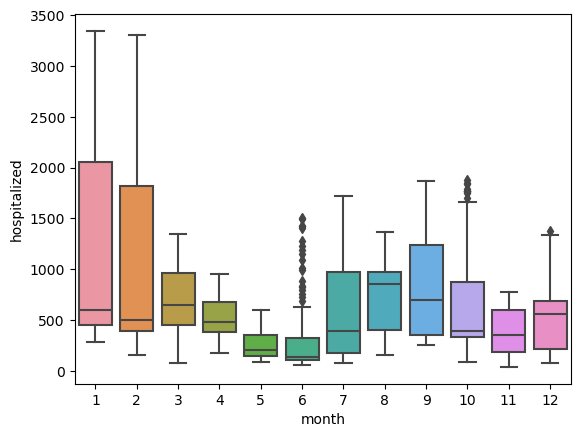

In [65]:
# visuallizing the above month category for hospitalizations over the years

sns.boxplot(x="month", y="hospitalized", data=hospital_table_3);

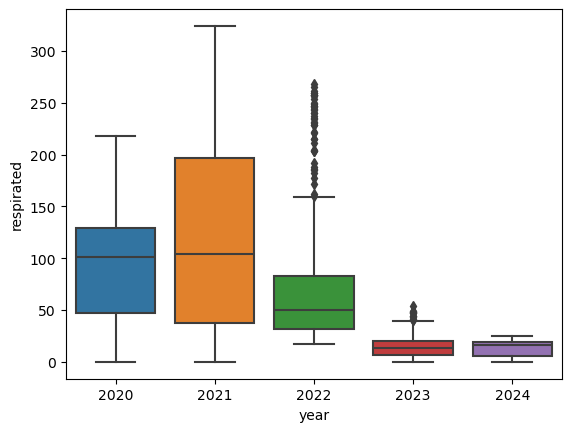

In [66]:
# visuallizing the above month category for respirations over the years

sns.boxplot(x="year", y="respirated", data=hospital_table_3);

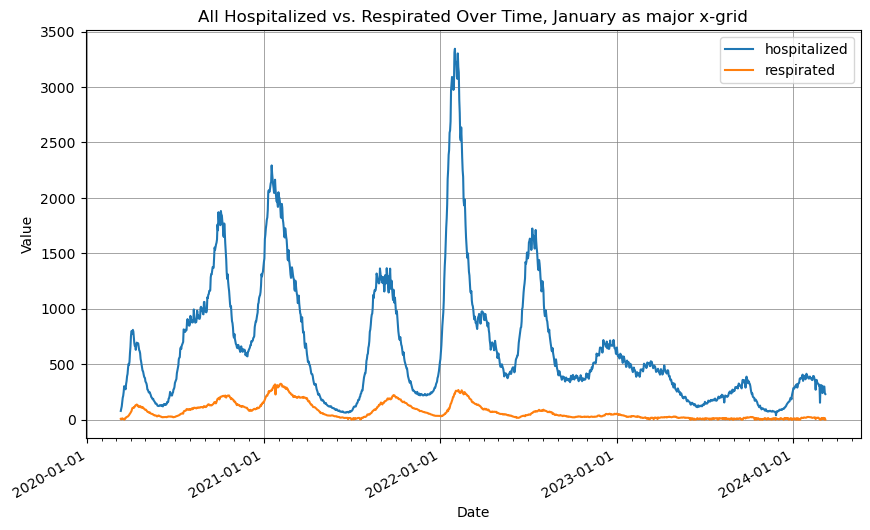

In [67]:
# visualization of 2 features, this time with month Januray as grid (to see the years change better)

import matplotlib.dates as mdates

# Select the two features you want to plot
feature1 = 'hospitalized'
feature2 = 'respirated'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature
ax.plot(hospital_table_3.index, hospital_table_3[feature2], label=feature2)

# Customize the plot
plt.title('All Hospitalized vs. Respirated Over Time, January as major x-grid')
plt.xlabel('Date')
plt.ylabel('Value')

# Set major locator to show ticks on January 1st
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set minor locator to show ticks on first day of each month
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Add grid for January only
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.5)

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

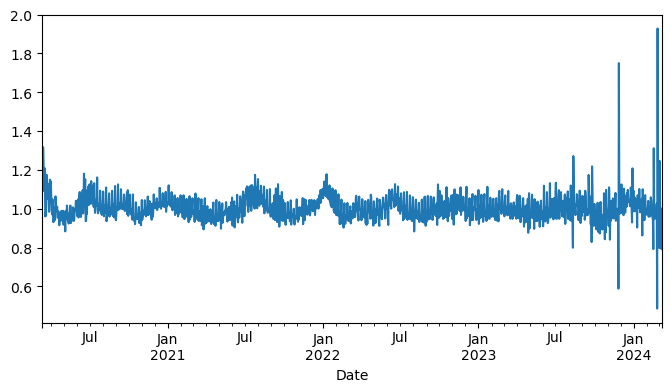

In [68]:
# Percent of change - I think compared to previous data?
hospital_table_3['Change'] = hospital_table_3.hospitalized.div(hospital_table_3.hospitalized.shift())
hospital_table_3['Change'].plot(figsize=(8,4));

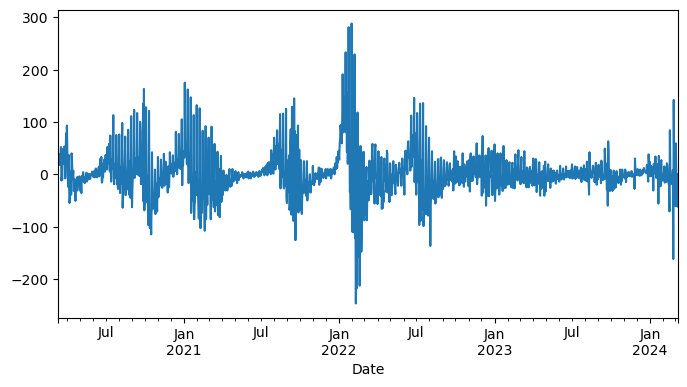

In [69]:
# Absolute change in successive rows - shows the drama of the data...
hospital_table_3.hospitalized.diff().plot(figsize=(8,4));

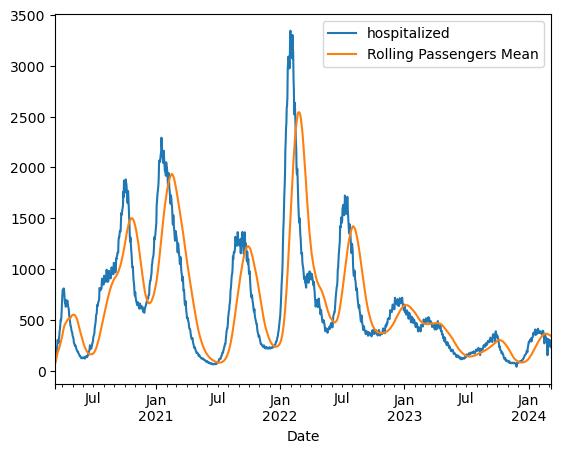

In [70]:
# Rolling window functions - smoothing the data with 45d data
rolling_data = hospital_table_3.hospitalized.rolling('45D').mean()
hospital_table_3.hospitalized.plot()
rolling_data.plot()
plt.legend(['hospitalized','Rolling Passengers Mean'])
# Plotting a rolling mean of 90 day window with original
plt.show()

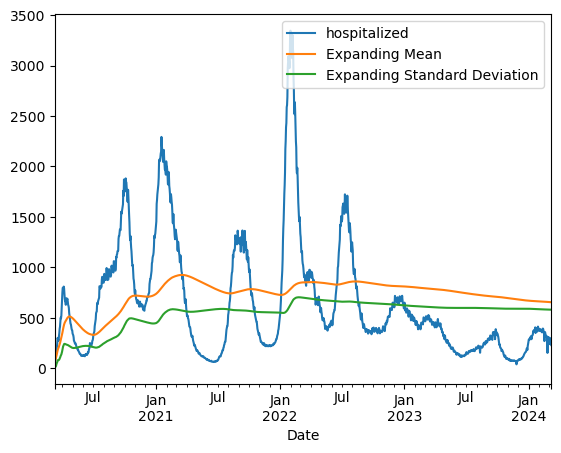

In [71]:
# Expanding window functions - the value of the statistic with all the data available up to that point in time
data_mean = hospital_table_3.hospitalized.expanding().mean()
data_std = hospital_table_3.hospitalized.expanding().std()
hospital_table_3.hospitalized.plot()
data_mean.plot()
data_std.plot()
plt.legend(['hospitalized','Expanding Mean','Expanding Standard Deviation'])
plt.show()

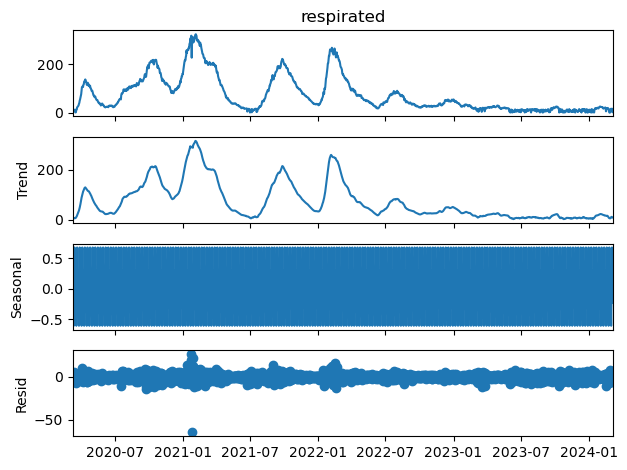

In [72]:
# the addiditve model doesn't seem to capture seasonality or overall trend
from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition_add = seasonal_decompose(hospital_table_3['hospitalized'], model='additive')
decomposition_add = seasonal_decompose(hospital_table_3['respirated'], model='additive')
decomposition_add.plot()
plt.show()

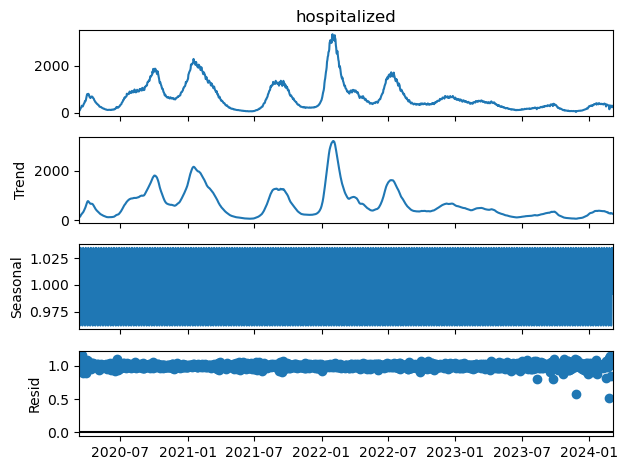

In [73]:
# same for multiplicative model
decomposition_mult = seasonal_decompose(hospital_table_3['hospitalized'], model='multiplicative')
decomposition_mult.plot()
plt.show()

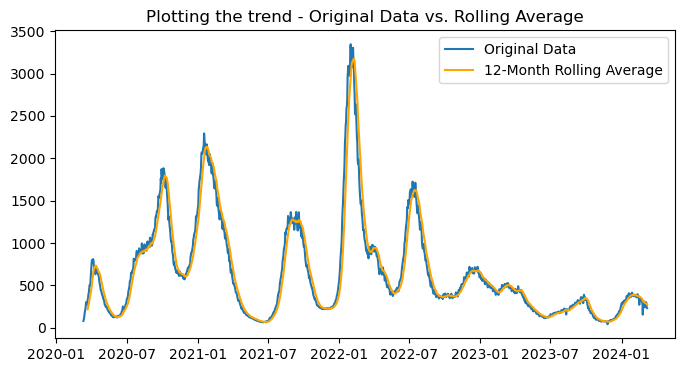

In [74]:
# Calculating a 12-month rolling average - trend not seen here as well
hospital_table_3['rolling_avg'] = hospital_table_3['hospitalized'].rolling(window=12).mean()

plt.figure(figsize=(8, 4))
plt.plot(hospital_table_3['hospitalized'], label='Original Data')
plt.plot(hospital_table_3['rolling_avg'], label='12-Month Rolling Average', color='orange')
plt.title('Plotting the trend - Original Data vs. Rolling Average')
plt.legend()
plt.show()

In [75]:
# is our data stationary (mean and variance remain the same)? - probably is
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    return result[1]  # Return the p-value
    
cols = ['hospitalized']
for column in cols:
    p_value = check_stationarity(hospital_table_3[column])
    print(f"Column '{column}': p-value = {p_value}")
    if p_value <= 0.05:
        print(f"  The series '{column}' is likely stationary")
    else:
        print(f"  The series '{column}' is likely non-stationary")
    print()

Column 'hospitalized': p-value = 0.010530885452052904
  The series 'hospitalized' is likely stationary



In [76]:
# cyclic monthly representations with sin/cos
#hospital_table_3['sin_day'] = np.sin(2 * np.pi * hospital_table_3['month'] / 12)
#hospital_table_3['cos_month'] = np.cos(2 * np.pi * hospital_table_3['month'] / 12)


# cyclic daily representations with sin
# Calculate the number of days since the start of the time series
days_since_start = (hospital_table_3.index - hospital_table_3.index.min()).days

# Create the sine function column
hospital_table_3['date_sine'] = np.sin(2 * np.pi * days_since_start / 365.25)
hospital_table_3.head()

,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,...,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick,month,year,Change,rolling_avg,date_sine
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-11,79,45.6,47.8,7.0,40.0,63.8,100.0,72.0,45.8,100.0,...,0.0,6.0,50.0,100.0,67.3,3,2020,NaN,NaN,0.000000
2020-03-12,102,49.0,49.9,2.0,40.0,63.8,100.0,95.0,49.5,100.0,...,0.0,1.0,50.0,100.0,67.3,3,2020,1.291139,NaN,0.017202
2020-03-13,120,47.5,49.2,8.0,40.0,63.8,100.0,109.0,47.7,100.0,...,68.0,3.0,50.0,100.0,67.3,3,2020,1.176471,NaN,0.034398
2020-03-14,158,49.4,47.4,12.0,0.0,70.3,100.0,148.0,50.7,100.0,...,68.0,10.0,20.0,100.0,76.8,3,2020,1.316667,NaN,0.051584
2020-03-15,197,51.8,46.5,6.0,20.0,74.0,100.0,183.0,52.5,100.0,...,61.3,8.0,37.5,100.0,79.0,3,2020,1.246835,NaN,0.068755
